In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')

/Users/eric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/eric/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/lx/4_g1bf5951j3ls64g8b047yr0000gn/T/ipykernel_24071/4129055296.py:7: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test.csv')
/var/folders/lx/4_g1bf5951j3ls64g8b047yr0000gn/T/ipykernel_24071/4129055296.py:8: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')
/var/folders/lx/4_g1bf5951j3ls64g8b047yr0000gn/T/ipykernel_2407

# Validation Dataset

In [5]:
validation.head(10)


,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,22109,899,17,9,2,4,2,2,2,18.0,...,28.0,8,8,0,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1410907944
1,22109,899,17,9,2,4,2,2,2,18.0,...,53.0,4,4,1,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1411438560
2,22109,899,17,9,2,4,2,2,2,18.0,...,78.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1412499792
3,22109,899,17,9,2,4,2,2,2,18.0,...,93.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1413030408
4,22109,899,17,9,2,4,2,2,2,18.0,...,103.0,3,3,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1413561024
5,22109,899,17,9,2,4,2,2,2,18.0,...,103.0,4,4,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1414091640
6,22109,899,17,9,2,4,2,2,2,18.0,...,128.0,3,3,3,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1414622256
7,22109,899,17,9,2,4,2,2,2,18.0,...,136.0,3,3,3,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1415174981
8,22109,899,17,9,2,4,2,2,2,18.0,...,161.0,1,1,4,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1415727706
9,22109,899,17,9,2,4,2,2,2,18.0,...,179.0,2,2,4,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1416280431


In [6]:
validation.describe()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,rank,...,year,round,circuitId,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,result_driver_standing
count,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,...,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,353762.000000,3.537620e+05
mean,23025.644134,949.382096,389.714492,41.551176,22.179802,9.134944,9.466336,6.604856,53.122707,8.519496,...,2015.711269,9.992577,22.165775,59526.779778,799.180245,59.347843,9.056433,9.056433,0.765486,1.371522e+09
std,527.091970,28.717657,399.655969,68.449414,20.437112,5.753342,6.078314,7.875208,18.447998,5.749906,...,1.290277,5.783412,23.519890,20516.069062,353.478038,75.019468,5.921759,5.921759,1.804607,4.747553e+08
min,22109.000000,899.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2013.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.211600e+04
25%,22572.000000,927.000000,8.000000,4.000000,7.000000,4.000000,4.000000,0.000000,51.000000,4.000000,...,2015.000000,5.000000,6.000000,65220.000000,865.000000,7.000000,4.000000,4.000000,0.000000,1.487298e+09
50%,23024.000000,952.000000,154.000000,6.000000,14.000000,8.000000,8.000000,4.000000,56.000000,8.000000,...,2016.000000,10.000000,14.000000,67625.000000,944.000000,30.000000,8.000000,8.000000,0.000000,1.553141e+09
75%,23480.000000,974.000000,822.000000,15.000000,27.000000,13.000000,14.000000,12.000000,67.000000,13.000000,...,2017.000000,15.000000,24.000000,69315.000000,1008.000000,82.000000,13.000000,13.000000,1.000000,1.606861e+09
max,23949.000000,997.000000,845.000000,210.000000,99.000000,22.000000,22.000000,50.000000,78.000000,22.000000,...,2018.000000,21.000000,73.000000,72187.000000,1110.000000,454.000000,27.000000,27.000000,15.000000,1.728590e+09


In [7]:
validation.shape

(353762, 55)

# Data Processing on Training Dataset

In [8]:
train.head(10)

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775
5,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,928018575
6,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,5,5,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,929640600
7,20025,833,642,51,2,1,1,1,1,9.0,...,6.00,7,7,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,1034851950
8,20025,833,642,51,2,1,1,1,1,9.0,...,6.00,8,8,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,1040398875
9,20025,833,642,51,2,1,1,1,1,9.0,...,6.00,8,8,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,1042301250


In [9]:
print(f"Shape: {train.shape}")
print("\nColumns:", train.columns.tolist())

print("\nData Types:\n", train.dtypes)


Shape: (2830101, 55)

Columns: ['resultId', 'racerId', 'driverId', 'constructorId', 'number', 'grid', 'position_x', 'positionText_x', 'positionOrder', 'points', 'laps', 'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round', 'circuitId', 'grand_prix', 'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverRef', 'driver_num', 'driver_code', 'forename', 'surname', 'dob', 'nationality', 'url_y', 'driverStandingsId', 'raceId_y', 'points_y', 'position', 'positionText_y', 'wins', 'constructorRef', 'company', 'nationality_y', 'url', 'status', 'result_driver_standing']

Data Types:
 resultId                    int64
racerId                     int64
driverId                    int64
constructorId               int64
number                     object
grid                        int64
position_x                 object
positionTe

In [10]:
missing = train.isnull().sum()
print("\nMissing Values:\n", missing)


Missing Values:
 resultId                  0
racerId                   0
driverId                  0
constructorId             0
number                    0
grid                      0
position_x                0
positionText_x            0
positionOrder             0
points                    0
laps                      0
time_x                    0
timetaken_in_millisec     0
fastestLap                0
rank                      0
fastestLapTime            0
max_speed                 0
statusId                  0
year                      0
round                     0
circuitId                 0
grand_prix                0
date                      0
time_y                    0
url_x                     0
fp1_date                  0
fp1_time                  0
fp2_date                  0
fp2_time                  0
fp3_date                  0
fp3_time                  0
quali_date                0
quali_time                0
sprint_date               0
sprint_time               0
dr

In [11]:
summary = train.describe(include='all').transpose()
print("\nSummary Stats:\n", summary)



Summary Stats:
                             count unique  \
resultId                2830101.0    NaN   
racerId                 2830101.0    NaN   
driverId                2830101.0    NaN   
constructorId           2830101.0    NaN   
number                  2830101.0  186.0   
grid                    2830101.0    NaN   
position_x                2830101     34   
positionText_x            2830101     39   
positionOrder           2830101.0    NaN   
points                  2830101.0    NaN   
laps                    2830101.0    NaN   
time_x                    2830101   5077   
timetaken_in_millisec     2830101   5233   
fastestLap                2830101    142   
rank                      2830101     50   
fastestLapTime            2830101   3639   
max_speed                 2830101   3721   
statusId                2830101.0    NaN   
year                    2830101.0    NaN   
round                   2830101.0    NaN   
circuitId               2830101.0    NaN   
grand_prix     

In [12]:
train.columns

Index(['resultId', 'racerId', 'driverId', 'constructorId', 'number', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points', 'laps',
       'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank',
       'fastestLapTime', 'max_speed', 'statusId', 'year', 'round', 'circuitId',
       'grand_prix', 'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'driverRef', 'driver_num',
       'driver_code', 'forename', 'surname', 'dob', 'nationality', 'url_y',
       'driverStandingsId', 'raceId_y', 'points_y', 'position',
       'positionText_y', 'wins', 'constructorRef', 'company', 'nationality_y',
       'url', 'status', 'result_driver_standing'],
      dtype='object')

In [13]:
train['points'] = train['points'].astype(int)

train_sorted = train.sort_values(
    by=['points', 'position', 'points_y'],
    ascending=[False, True, False]
)

train = train_sorted.groupby(['racerId', 'driverId'], as_index=False).first()


In [14]:
unique_grand_prix = train['grand_prix'].unique()
print(unique_grand_prix)
num_unique_grand_prix = len(unique_grand_prix)

unique_driver_nationality = train['nationality'].unique()
unique_constructor_nationality = train['nationality_y'].unique()

print("Unique Driver Nationalities:\n", unique_driver_nationality)
print("Unique Constructor Nationalities:\n", unique_constructor_nationality)

num_unique_driver_nationality = len(unique_driver_nationality)
num_unique_constructor_nationality = len(unique_constructor_nationality)

print("Number of Unique Grand Prix:", num_unique_grand_prix)

print("Number of Unique Driver Nationalities:", num_unique_driver_nationality)
print("Number of Unique Constructor Nationalities:", num_unique_constructor_nationality)

['Australian Grand Prix' 'Malaysian Grand Prix' 'Chinese Grand Prix'
 'Bahrain Grand Prix' 'Spanish Grand Prix' 'Monaco Grand Prix'
 'Turkish Grand Prix' 'British Grand Prix' 'German Grand Prix'
 'Hungarian Grand Prix' 'European Grand Prix' 'Belgian Grand Prix'
 'Italian Grand Prix' 'Singapore Grand Prix' 'Japanese Grand Prix'
 'Brazilian Grand Prix' 'Abu Dhabi Grand Prix' 'Canadian Grand Prix'
 'French Grand Prix' 'United States Grand Prix' 'San Marino Grand Prix'
 'Austrian Grand Prix' 'Argentine Grand Prix' 'Luxembourg Grand Prix'
 'Portuguese Grand Prix' 'Pacific Grand Prix' 'South African Grand Prix'
 'Mexican Grand Prix' 'Korean Grand Prix' 'Detroit Grand Prix'
 'Dutch Grand Prix' 'Dallas Grand Prix' 'United States Grand Prix West'
 'Swiss Grand Prix' 'Caesars Palace Grand Prix' 'Swedish Grand Prix'
 'Indianapolis 500' 'Moroccan Grand Prix' 'Pescara Grand Prix'
 'Indian Grand Prix']
Unique Driver Nationalities:
 ['British' 'German' 'Spanish' 'Finnish' 'Japanese' 'French' 'Polish'

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'grand_prix' column
train['grand_prix'] = le.fit_transform(train['grand_prix'])

# Optional: print the mapping of labels to original Grand Prix names
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Grand Prix Label Mapping:\n", label_mapping)


# Encode driver nationality
le_driver = LabelEncoder()
train['nationality'] = le_driver.fit_transform(train['nationality'])
driver_nationality_mapping = dict(zip(le_driver.classes_, le_driver.transform(le_driver.classes_)))
print("\nDriver Nationality Label Mapping:\n", driver_nationality_mapping)

# Encode constructor nationality
le_constructor = LabelEncoder()
train['nationality_y'] = le_constructor.fit_transform(train['nationality_y'])
constructor_nationality_mapping = dict(zip(le_constructor.classes_, le_constructor.transform(le_constructor.classes_)))
print("\nConstructor Nationality Label Mapping:\n", constructor_nationality_mapping)



Grand Prix Label Mapping:
 {'Abu Dhabi Grand Prix': 0, 'Argentine Grand Prix': 1, 'Australian Grand Prix': 2, 'Austrian Grand Prix': 3, 'Bahrain Grand Prix': 4, 'Belgian Grand Prix': 5, 'Brazilian Grand Prix': 6, 'British Grand Prix': 7, 'Caesars Palace Grand Prix': 8, 'Canadian Grand Prix': 9, 'Chinese Grand Prix': 10, 'Dallas Grand Prix': 11, 'Detroit Grand Prix': 12, 'Dutch Grand Prix': 13, 'European Grand Prix': 14, 'French Grand Prix': 15, 'German Grand Prix': 16, 'Hungarian Grand Prix': 17, 'Indian Grand Prix': 18, 'Indianapolis 500': 19, 'Italian Grand Prix': 20, 'Japanese Grand Prix': 21, 'Korean Grand Prix': 22, 'Luxembourg Grand Prix': 23, 'Malaysian Grand Prix': 24, 'Mexican Grand Prix': 25, 'Monaco Grand Prix': 26, 'Moroccan Grand Prix': 27, 'Pacific Grand Prix': 28, 'Pescara Grand Prix': 29, 'Portuguese Grand Prix': 30, 'San Marino Grand Prix': 31, 'Singapore Grand Prix': 32, 'South African Grand Prix': 33, 'Spanish Grand Prix': 34, 'Swedish Grand Prix': 35, 'Swiss Grand P

In [16]:
columns_to_drop = [
    'resultId', 'racerId', 'positionText_x', 'time_x', 'timetaken_in_millisec',
    'fastestLapTime', 'max_speed', 'statusId', 'date', 'time_y',
    'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date','number',
    'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
    'driverRef', 'driver_num', 'driver_code', 'forename', 'surname', 'dob','fastestLap', 'rank', 'year', 'round',
     'url_y', 'constructorRef', 'company',  'url',
    'status',  'positionText_y','position_x',
]
print(len(columns_to_drop))
train_cleaned = train.drop(columns=columns_to_drop)



39


In [17]:
train_cleaned.columns

Index(['driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps',
       'circuitId', 'grand_prix', 'nationality', 'driverStandingsId',
       'raceId_y', 'points_y', 'position', 'wins', 'nationality_y',
       'result_driver_standing'],
      dtype='object')

In [18]:
train_cleaned.shape

(21998, 16)

In [19]:
train_cleaned.head(10)

,driverId,constructorId,grid,positionOrder,points,laps,circuitId,grand_prix,nationality,driverStandingsId,raceId_y,points_y,position,wins,nationality_y,result_driver_standing
0,1,1,18,20,0,58,1,2,8,69730,1030,413.0,1,11,5,528065290
1,2,2,9,10,0,58,1,2,18,28,20,16.0,2,0,10,211764
2,3,3,5,6,3,58,1,2,18,68132,968,385.0,1,9,5,515009788
3,4,4,10,5,4,58,1,2,34,64264,354,246.0,1,5,9,485707312
4,5,1,12,19,0,0,1,2,16,13,19,10.0,4,0,5,98436
5,6,3,11,18,0,17,1,2,23,6,18,3.0,6,0,5,45426
6,7,5,17,8,1,58,1,2,17,7,18,2.0,7,0,14,52927
7,8,6,7,15,0,55,1,2,16,13972,52,110.0,1,6,14,105740096
8,9,2,4,14,0,55,1,2,29,121,24,42.0,1,1,10,915607
9,10,7,19,4,5,58,1,2,18,17714,3,10.0,4,0,15,133864698


# EDA on cleaned Training Dataset

In [20]:
print("Shape of dataset:", train_cleaned.shape)
print("\nData Types:\n", train_cleaned.dtypes)
print("\nMissing Values:\n", train_cleaned.isnull().sum())
print("\nSummary Statistics:\n", train_cleaned.describe(include='all'))


Shape of dataset: (21998, 16)

Data Types:
 driverId                    int64
constructorId               int64
grid                        int64
positionOrder               int64
points                      int64
laps                        int64
circuitId                   int64
grand_prix                  int64
nationality                 int64
driverStandingsId           int64
raceId_y                    int64
points_y                  float64
position                    int64
wins                        int64
nationality_y               int64
result_driver_standing      int64
dtype: object

Missing Values:
 driverId                  0
constructorId             0
grid                      0
positionOrder             0
points                    0
laps                      0
circuitId                 0
grand_prix                0
nationality               0
driverStandingsId         0
raceId_y                  0
points_y                  0
position                  0
wins            

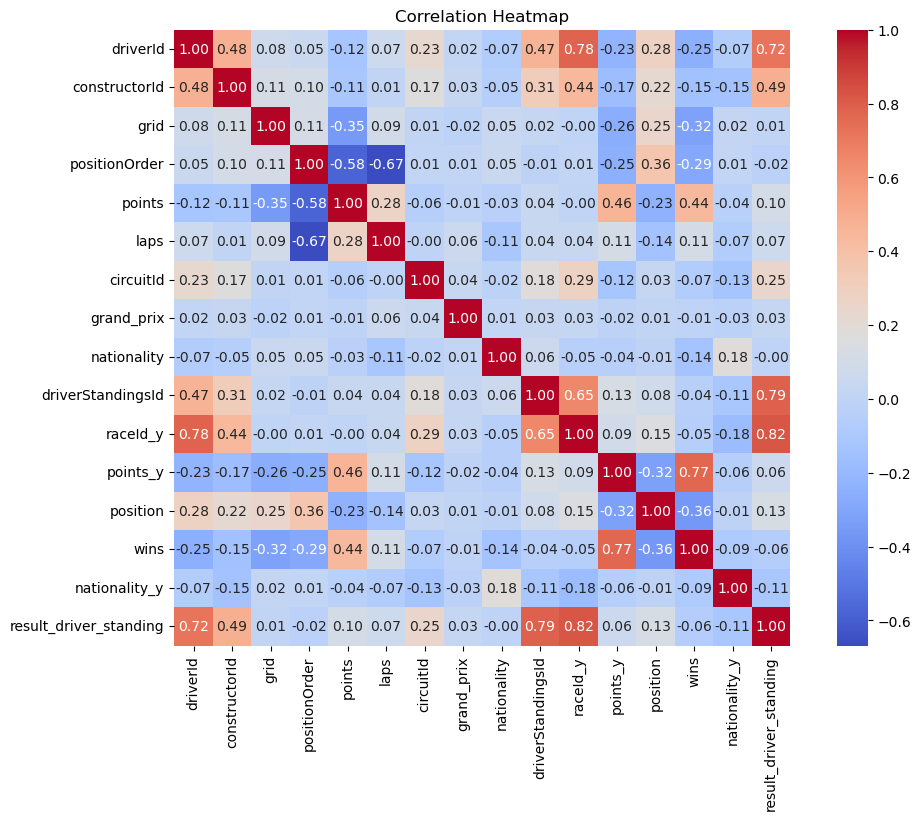

In [22]:
# Get only numeric columns from train_cleaned
numeric_cols = train_cleaned.select_dtypes(include='number').columns

# Plot heatmap
plt.figure(figsize=(12, 8))
corr = train_cleaned[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

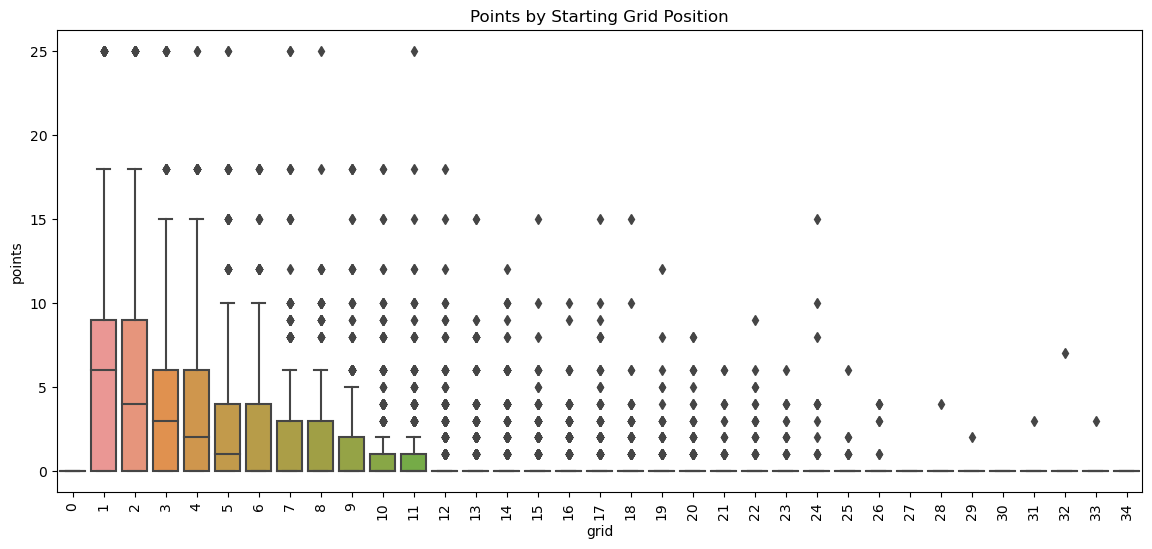

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='grid', y='points', data=train_cleaned)
plt.title("Points by Starting Grid Position")
plt.xticks(rotation=90)
plt.show()


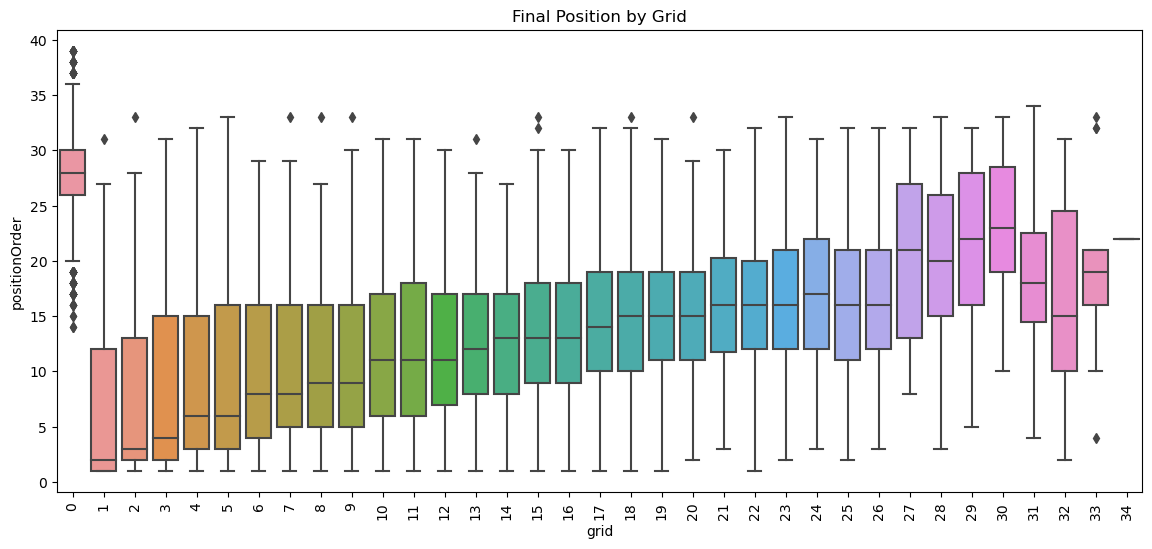

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='grid', y='positionOrder', data=train_cleaned)
plt.title("Final Position by Grid")
plt.xticks(rotation=90)
plt.show()


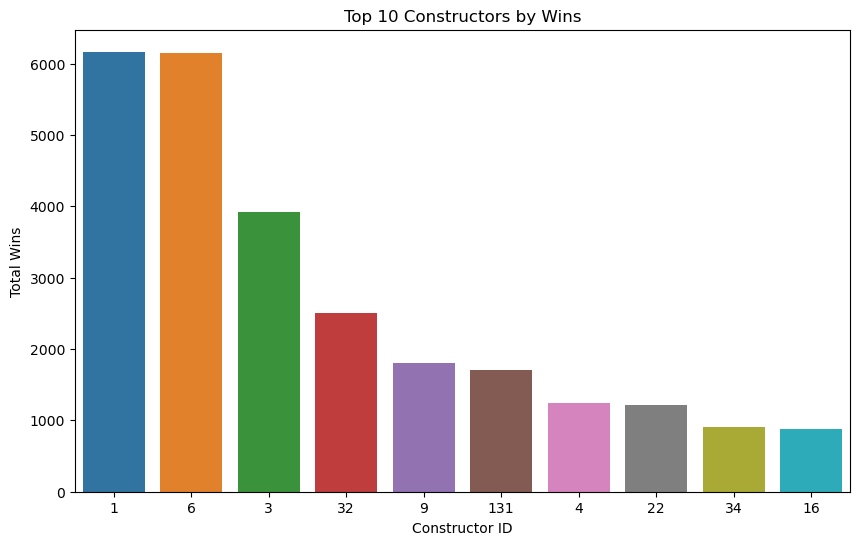

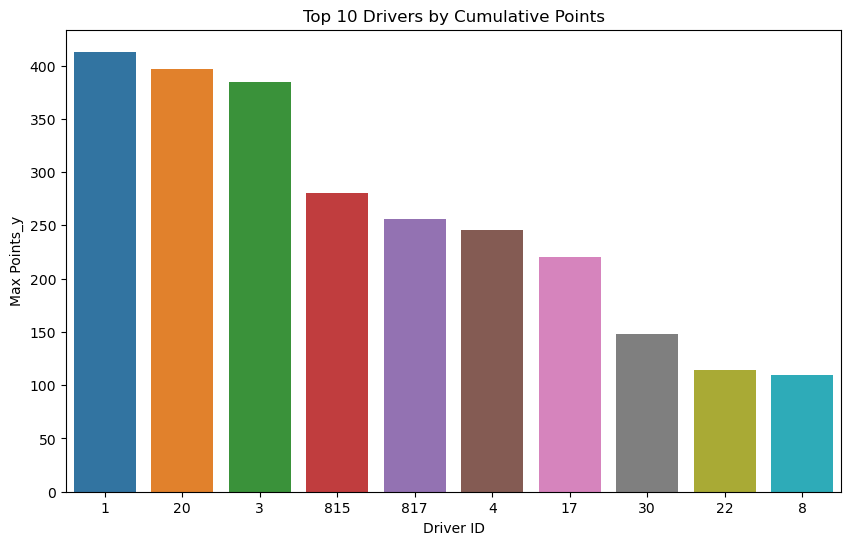

In [25]:

top_teams = train_cleaned.groupby('constructorId')['wins'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.index.astype(str), y=top_teams.values)
plt.title("Top 10 Constructors by Wins")
plt.xlabel("Constructor ID")
plt.ylabel("Total Wins")
plt.show()


top_drivers = train_cleaned.groupby('driverId')['points_y'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drivers.index.astype(str), y=top_drivers.values)
plt.title("Top 10 Drivers by Cumulative Points")
plt.xlabel("Driver ID")
plt.ylabel("Max Points_y")
plt.show()




In [27]:
constructor_ids = [1, 6, 3, 32, 9, 131, 4, 22, 34, 16]
driver_ids = [1, 20, 3, 815, 817, 4, 17, 30,22, 8]

driver_info = train[train['driverId'].isin(driver_ids)][['driverId', 'forename', 'surname']].drop_duplicates()
driver_info = pd.DataFrame(driver_ids, columns=['driverId']).merge(driver_info, on='driverId', how='left')
driver_info['full_name'] = (driver_info['forename'].fillna('') + ' ' + driver_info['surname'].fillna('')).str.strip()

constructor_info = train[train['constructorId'].isin(constructor_ids)][['constructorId', 'company']].drop_duplicates()
constructor_info = pd.DataFrame(constructor_ids, columns=['constructorId']).merge(constructor_info, on='constructorId', how='left')

print("\nConstructor Info:")
print(constructor_info[['constructorId', 'company']])

print("\nDriver Info:")
print(driver_info[['driverId', 'full_name']])



Constructor Info:
   constructorId     company
0              1     McLaren
1              6     Ferrari
2              3    Williams
3             32  Team Lotus
4              9    Red Bull
5            131    Mercedes
6              4     Renault
7             22    Benetton
8             34     Brabham
9             16         BAR

Driver Info:
   driverId           full_name
0         1      Lewis Hamilton
1        20    Sebastian Vettel
2         3        Nico Rosberg
3       815        Sergio Pérez
4       817    Daniel Ricciardo
5         4     Fernando Alonso
6        17         Mark Webber
7        30  Michael Schumacher
8        22  Rubens Barrichello
9         8      Kimi Räikkönen


# Modeling

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor

# Assume train_cleaned, test, and validation are already loaded

# Ensure 'position' in validation is numeric
validation['position'] = pd.to_numeric(validation['position'], errors='coerce')

# Label encode all object columns consistently
for col in ['grand_prix', 'nationality', 'nationality_y']:
    le = LabelEncoder()
    all_vals = pd.concat([train_cleaned[col], test[col], validation[col]], axis=0).astype(str)
    le.fit(all_vals)
    train_cleaned[col] = le.transform(train_cleaned[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    validation[col] = le.transform(validation[col].astype(str))

# Features and target
X_train_final = train_cleaned.drop(columns=['position'])
y_train_final = train_cleaned['position']

X_validation = validation[X_train_final.columns]
y_validation = validation['position']

# Define 5 models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    preds = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation, preds))
    print(f"{name} RMSE: {rmse:.4f}")


Random Forest RMSE: 4.9579
XGBoost RMSE: 5.0548
Gradient Boosting RMSE: 5.7675
Lasso RMSE: 6.2862
Ridge RMSE: 6.3169


/Users/eric/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.27491e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Xg Boost

In [68]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,500,1000],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
}

# Set up the base model
xgb = XGBRegressor(random_state=42)

# Grid search using 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train_final, y_train_final)

# Best model
best_xgb = grid_search.best_estimator_
print("Best XGBoost Params:", grid_search.best_params_)

# Evaluate on validation set
xgb_preds = best_xgb.predict(X_validation)
xgb_rmse = np.sqrt(mean_squared_error(y_validation, xgb_preds))
print(f"Tuned XGBoost RMSE on validation: {xgb_rmse:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}
Tuned XGBoost RMSE on validation: 4.9968


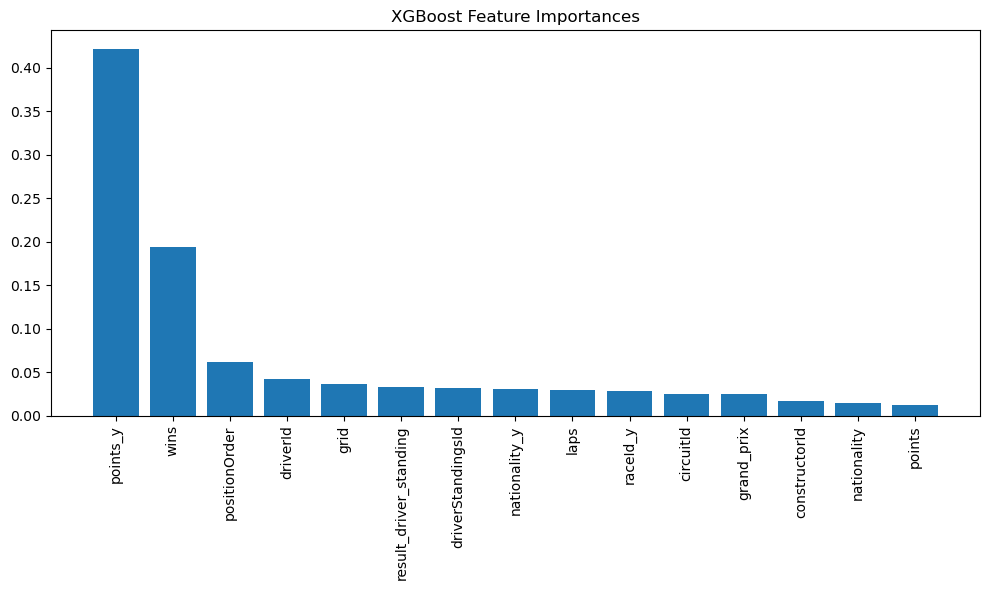

In [67]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_xgb.feature_importances_
features = X_train_final.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()
